In [1]:
import pandas as pd
import numpy as np
import sklearn.feature_selection
import sklearn.metrics
import sklearn.model_selection
import sklearn.linear_model
import sklearn.covariance
import sklearn.cross_decomposition
import sklearn.feature_extraction
import sklearn.svm
import sklearn.compose
import sklearn.preprocessing
import matplotlib.pyplot as plt

import statsmodels.api as sm
# from statsmodels.sandbox.regression.gmm import IV2SLS
from linearmodels.iv import IV2SLS

In [2]:
combo_df = pd.read_csv('combined.csv')


In [3]:
df = combo_df.__deepcopy__()

df = df[df['Price'] >= 0]
df

,Unnamed: 0,Date,Zillow,MSA,CSA,CBSA,Total,1 Unit,2 Units,3 and 4 Units,...,Population 1,Population 5,Population Diff,Population,Pop Growth 1 Year,Pop -1 Years,Pop Percent 1 Year,Pop Growth 5 Year,Pop -5 Years,Pop Percent 5 Year
0,0,2019-11-30,"Abilene, TX","Abilene, TX",999.0,10180.0,23.0,21.0,2.0,0.0,...,171795.0,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925
1,1,2019-12-31,"Abilene, TX","Abilene, TX",999.0,10180.0,37.0,31.0,6.0,0.0,...,171795.0,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925
2,2,2020-01-31,"Abilene, TX","Abilene, TX",999.0,10180.0,29.0,29.0,0.0,0.0,...,NaN,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298
3,3,2020-02-29,"Abilene, TX","Abilene, TX",999.0,10180.0,30.0,30.0,0.0,0.0,...,NaN,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298
4,4,2020-03-31,"Abilene, TX","Abilene, TX",999.0,10180.0,29.0,27.0,2.0,0.0,...,NaN,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121959,121959,2022-03-31,"Yuma, AZ","Yuma, AZ",999.0,49740.0,89.0,83.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121960,121960,2022-04-30,"Yuma, AZ","Yuma, AZ",999.0,49740.0,66.0,66.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121961,121961,2022-05-31,"Yuma, AZ","Yuma, AZ",999.0,49740.0,88.0,84.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121962,121962,2022-06-30,"Yuma, AZ","Yuma, AZ",999.0,49740.0,65.0,65.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Date'] = pd.to_datetime(df['Date']).astype('int64')
df['Seasonal Price'] = df['Price']-df['Seasonal']
df.dtypes

Unnamed: 0                                  int64
Date                                        int64
Zillow                                     object
MSA                                        object
CSA                                       float64
CBSA                                      float64
Total                                     float64
1 Unit                                    float64
2 Units                                   float64
3 and 4 Units                             float64
5 Units or More                           float64
Num of Structures With 5 Units or More    float64
Year                                        int64
Month                                       int64
filename                                   object
Price                                     float64
Seasonal                                  float64
Trend                                     float64
Residual                                  float64
Price Change                              float64


In [5]:
df = df[['Date', 'CSA', 'Total', '1 Unit','2 Units', '3 and 4 Units', '5 Units or More',
         'Num of Structures With 5 Units or More', 'Year', 'Month', 'filename', 'Price',
         'Year as Date', 'Population 1', 'Population 5','Population Diff', 'Population', 'Pop Growth 1 Year', 'Pop -1 Years','Pop Percent 1 Year', 'Pop Growth 5 Year', 'Pop -5 Years',
         'Pop Percent 5 Year', 'Seasonal Price']]
df

,Date,CSA,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Num of Structures With 5 Units or More,Year,Month,...,Population 5,Population Diff,Population,Pop Growth 1 Year,Pop -1 Years,Pop Percent 1 Year,Pop Growth 5 Year,Pop -5 Years,Pop Percent 5 Year,Seasonal Price
0,1575072000000000000,999.0,23.0,21.0,2.0,0.0,0.0,0.0,2019,11,...,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925,80051.677083
1,1577750400000000000,999.0,37.0,31.0,6.0,0.0,0.0,0.0,2019,12,...,170669.0,0.006554,170669.0,660.0,170009.0,0.003882,3498.0,167171.0,0.020925,81005.614583
2,1580428800000000000,999.0,29.0,29.0,0.0,0.0,0.0,0.0,2020,1,...,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298,81734.822917
3,1582934400000000000,999.0,30.0,30.0,0.0,0.0,0.0,0.0,2020,2,...,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298,83491.781250
4,1585612800000000000,999.0,29.0,27.0,2.0,0.0,0.0,0.0,2020,3,...,171354.0,NaN,171354.0,685.0,170669.0,0.004014,3409.0,167945.0,0.020298,85660.489583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121959,1648684800000000000,999.0,89.0,83.0,6.0,0.0,0.0,0.0,2022,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356347.574653
121960,1651276800000000000,999.0,66.0,66.0,0.0,0.0,0.0,0.0,2022,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362600.157986
121961,1653955200000000000,999.0,88.0,84.0,4.0,0.0,0.0,0.0,2022,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371571.157986
121962,1656547200000000000,999.0,65.0,65.0,0.0,0.0,0.0,0.0,2022,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377487.491319


In [6]:
X = df.drop(['Price'], axis = 'columns')
y = df[['Price']]

for name in df['filename'].unique():
    df[name] = np.where(df['filename']==name,1,0)
    
df['1 Unit Ratio'] = df['1 Unit']/df['Total']
df = df.dropna(axis = 'rows')




/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/772015899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = np.where(df['filename']==name,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/772015899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = np.where(df['filename']==name,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/772015899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [7]:
df = df.drop(['filename','Year as Date'], axis = 'columns')
df.dtypes

Date                                                             int64
CSA                                                            float64
Total                                                          float64
1 Unit                                                         float64
2 Units                                                        float64
3 and 4 Units                                                  float64
5 Units or More                                                float64
Num of Structures With 5 Units or More                         float64
Year                                                             int64
Month                                                            int64
Price                                                          float64
Population 1                                                   float64
Population 5                                                   float64
Population Diff                                                float64
Popula

In [40]:
def predict_y(df, scaler, model, target):
    X = df.drop([col for col in df.columns if 'price' in col.lower()], axis = 'columns').to_numpy()
    if scaler:
        scaler = scaler.fit(X)
        X = scaler.transform(X)
    
    y = df[target].to_numpy()
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, random_state = 42)
    model = model
    model.fit(X_train, y_train)
    
    return model.predict(X_test), y_test
    


In [41]:
y_pred_try_1, y_actual = predict_y(df, sklearn.preprocessing.StandardScaler(), sklearn.linear_model.LinearRegression(), 'Price')

In [10]:

X1 = df.drop([col for col in df.columns if 'price' in col.lower()], axis = 'columns').to_numpy()

y1 = df['Price'].to_numpy()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X1,y1, random_state = 42)
scaler1 = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



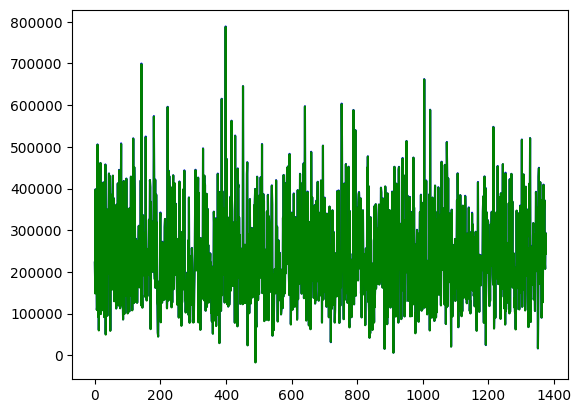

In [11]:
plt.plot(y_pred, color = 'blue')
plt.plot(y_pred_try_1, color = 'green')

In [12]:
print(sklearn.metrics.mean_absolute_error(y_test, y_pred_try_1))
print(sklearn.metrics.mean_squared_error(y_test, y_pred_try_1))
print(sklearn.metrics.r2_score(y_test, y_pred_try_1))

74621.72655979695
16396121425.923864
0.4126741020978515


In [13]:
print(sklearn.metrics.mean_absolute_error(y_test, y_pred))
print(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(sklearn.metrics.r2_score(y_test, y_pred))

74741.65402208718
16399279680.249166
0.4125609701863936


In [14]:
print(df.corr(method = 'spearman')['Price'])

Date                                                          -0.005152
CSA                                                            0.005863
Total                                                          0.252116
1 Unit                                                         0.232591
2 Units                                                        0.162777
3 and 4 Units                                                  0.186332
5 Units or More                                                0.260139
Num of Structures With 5 Units or More                         0.258116
Year                                                                NaN
Month                                                         -0.005152
Price                                                          1.000000
Population 1                                                   0.171656
Population 5                                                   0.167084
Population Diff                                                0

In [15]:
print(df.columns.to_list())

['Date', 'CSA', 'Total', '1 Unit', '2 Units', '3 and 4 Units', '5 Units or More', 'Num of Structures With 5 Units or More', 'Year', 'Month', 'Price', 'Population 1', 'Population 5', 'Population Diff', 'Population', 'Pop Growth 1 Year', 'Pop -1 Years', 'Pop Percent 1 Year', 'Pop Growth 5 Year', 'Pop -5 Years', 'Pop Percent 5 Year', 'Seasonal Price', 'Metro_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month (1)', 'Metro_zhvi_uc_sfrcondo_tier_0.0_0.33_sm_sa_month', 'Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month', 'Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_month', '1 Unit Ratio']


In [16]:
X_ols = df.drop([col for col in df.columns if 'price' in col.lower()], axis = 'columns')

y_ols = df['Price']
X_ols_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X_ols)

# x_const = sm.add_constant(X_ols_scaled)
first_model_results = sm.OLS(y_ols, X_ols_scaled).fit()
first_model_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              1034.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:57:54   Log-Likelihood:                         -72270.
No. Observations:                5505   AIC:                                  1.446e+05
Df Residuals:                    5480   BIC:                                  1.448e+05
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.436e+18   9.84e+15    145.922      0.000    1.42e+18    1.46e+18
x2          6088.5188   1695.098      3.592      0.000    2765.454    9411.583
x3         -5.472e+14   3.75e+12   -145.922      0.000   -5.55e+14    -5.4e+14
x4          2.473e+14   1.69e+12    145.922      0.000    2.44e+14    2.51e+14
x5           9.26e+12   6.35e+10    145.922      0.000    9.14e+12    9.38e+12
x6          7.946e+12   5.45e+10    145.922      0.000    7.84e+12    8.05e+12
x7          3.378e+14   2.31e+12    145.922      0.000    3.33e+14    3.42e+14
x8          1.909e+04   5375.242      3.552      0.000    8557.035    2.96e+04
const       3.127e+14   2.14e+12    145.922      0.000    3.08e+14    3.17e+14
x9         -1.436e+18   9.84e+15   -145.922      0.000   -1.46e+18   -1.42e+18
x10        -3.959e+06   4.61e+05     -8.579      0.000   -4.86e+06   -3.05e+06
x11         1.027e+15   7.04e+12    145.922      0.000    1.01e+15    1.04e+15
x12        -7579.3691   3323.908     -2.280      0.023   -1.41e+04   -1063.191
x13        -9.744e+14   6.68e+12   -145.922      0.000   -9.87e+14   -9.61e+14
x14         8.742e+12   5.99e+10    145.922      0.000    8.62e+12    8.86e+12
x15         3.362e+14    2.3e+12    145.922      0.000    3.32e+14    3.41e+14
x16        -9.995e+04   6104.813    -16.372      0.000   -1.12e+05    -8.8e+04
x17        -1.813e+13   1.24e+11   -145.922      0.000   -1.84e+13   -1.79e+13
x18        -3.817e+14   2.62e+12   -145.922      0.000   -3.87e+14   -3.77e+14
x19          1.06e+05   6839.081     15.500      0.000    9.26e+04    1.19e+05
x20        -6.747e+14   4.62e+12   -145.922      0.000   -6.84e+14   -6.66e+14
x21         -6.65e+14   4.56e+12   -145.922      0.000   -6.74e+14   -6.56e+14
x22        -6.533e+14   4.48e+12   -145.922      0.000   -6.62e+14   -6.45e+14
x23        -6.623e+14   4.54e+12   -145.922      0.000   -6.71e+14   -6.53e+14
x24        -6.623e+14   4.54e+12   -145.922      0.000   -6.71e+14   -6.53e+14
x25        -6.501e+14   4.46e+12   -145.922      0.000   -6.59e+14   -6.41e+14
x26        -6.539e+14   4.48e+12   -145.922      0.000   -6.63e+14   -6.45e+14
x27        -6.581e+14   4.51e+12   -145.922      0.000   -6.67e+14   -6.49e+14
x28        -6.381e+14   4.37e+12   -145.922      0.000   -6.47e+14   -6.29e+14
x29        -6.544e+14   4.48e+12   -145.922      0.000   -6.63e+14   -6.46e+14
x30         -1.44e+04   1933.356     -7.450      0.000   -1.82e+04   -1.06e+04
==============================================================================
Omnibus:                     4580.296   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163978.389
Skew:                           3.798   Prob(JB):            

In [17]:
x_const = sm.add_constant(X_ols_scaled)
second_model_results = sm.OLS(y_ols, x_const).fit()
second_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     190.5
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:57:54   Log-Likelihood:                -72257.
No. Observations:                5505   AIC:                         1.446e+05
Df Residuals:                    5480   BIC:                         1.447e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.4e+05   1639.938    146.339      0.000    2.37e+05    2.43e+05
x1            81.1143    821.765      0.099      0.921   -1529.872    1692.101
x2          5412.2444   1691.157      3.200      0.001    2096.906    8727.583
x3         -3.026e+04   2664.912    -11.356      0.000   -3.55e+04    -2.5e+04
x4         -7.911e+04   5254.660    -15.055      0.000   -8.94e+04   -6.88e+04
x5         -1.386e+04   2785.824     -4.974      0.000   -1.93e+04   -8395.289
x6         -3077.0438   2435.551     -1.263      0.207   -7851.690    1697.603
x7          9351.4783   4619.255      2.024      0.043     295.904    1.84e+04
x8          1.908e+04   5362.764      3.558      0.000    8569.168    2.96e+04
x9          -3.19e-08   3.69e-09     -8.648      0.000   -3.91e-08   -2.47e-08
x10           81.1143    821.765      0.099      0.921   -1529.872    1692.101
x11        -3.956e+06    4.6e+05     -8.593      0.000   -4.86e+06   -3.05e+06
x12          9.99e+05   1.14e+05      8.740      0.000    7.75e+05    1.22e+06
x13        -7612.8306   3316.192     -2.296      0.022   -1.41e+04   -1111.778
x14          9.99e+05   1.14e+05      8.740      0.000    7.75e+05    1.22e+06
x15        -5.562e+04   7529.377     -7.387      0.000   -7.04e+04   -4.09e+04
x16         9.879e+05   1.13e+05      8.751      0.000    7.67e+05    1.21e+06
x17            -1e+05   6090.642    -16.421      0.000   -1.12e+05   -8.81e+04
x18          2.14e+05   1.58e+04     13.527      0.000    1.83e+05    2.45e+05
x19         9.971e+05   1.15e+05      8.700      0.000    7.72e+05    1.22e+06
x20         1.061e+05   6823.205     15.553      0.000    9.27e+04    1.19e+05
x21        -3.196e+04   1467.231    -21.783      0.000   -3.48e+04   -2.91e+04
x22        -2.317e+04   1472.265    -15.735      0.000   -2.61e+04   -2.03e+04
x23        -4727.4158   1478.002     -3.199      0.001   -7624.886   -1829.945
x24         1.912e+04   1473.449     12.975      0.000    1.62e+04     2.2e+04
x25         4.717e+04   1473.673     32.008      0.000    4.43e+04    5.01e+04
x26        -1.613e+04   1479.761    -10.903      0.000    -1.9e+04   -1.32e+04
x27        -1458.9023   1477.745     -0.987      0.324   -4355.869    1438.064
x28        -2.647e+04   1475.633    -17.941      0.000   -2.94e+04   -2.36e+04
x29        -2162.0827   1485.564     -1.455      0.146   -5074.377     750.211
x30         4.034e+04   1477.492     27.303      0.000    3.74e+04    4.32e+04
x31        -1.445e+04   1928.868     -7.492      0.000   -1.82e+04   -1.07e+04
==============================================================================
Omnibus:                     4604.064   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166969.216
Skew:                           3.825   Prob(JB):                         0.00
Ku

In [18]:
# import statsmodels.formula.api as smf
# # y_ols = df['Price']
# # X_ols_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X_ols)
# # 'Date', 'CSA', 'Total', '1 Unit', '2 Units', '3 and 4 Units', '5 Units or More', 'Num of Structures With 5 Units or More', 'Year', 'Month', 'Price', 'Population 1', 'Population 5', 'Population Diff', 'Population', 'Pop Growth 1 Year', 'Pop -1 Years', 'Pop Percent 1 Year', 'Pop Growth 5 Year', 'Pop -5 Years', 'Pop Percent 5 Year', 'Seasonal Price', 'Metro_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month', 'Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month (1)', 'Metro_zhvi_uc_sfrcondo_tier_0.0_0.33_sm_sa_month', 'Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month', 'Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_month', '1 Unit Ratio'
# # x_const = sm.add_constant(X_ols_scaled)
# formula = 'Price ~ Date + CSA + Total+1 Unit+2 Units+3 and 4 Units+5 Units or More+Num of Structures With 5 Units or More+Year+Month+Population 1+Population 5+Population Diff+Population+Pop Growth 1 Year+Pop -1 Years+Pop Percent 1 Year+Pop Growth 5 Year+Pop -5 Years+Pop Percent 5 Year+1 Unit Ratio'
# third_model_results = smf.ols(formula=formula, data=df).fit()
# third_model_results.summary()

In [19]:
# y_seas_adj = df['Seasonal Price']

# second_model_results = sm.OLS(y_seas_adj, x_const).fit()
# second_model_results.summary()

In [20]:

# iv2sls_model = IV2SLS(y, df[endog], None, None ).fit(cov_type="unadjusted")
# print(iv2sls_model)

In [21]:
combo_housing_income_df = pd.read_csv('combo_housing_income.csv')
combo_housing_income_df.head()

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3067752484.py:1: DtypeWarning: Columns (1,10,17,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,197,198,199,200,201,202) have mixed types. Specify dtype option on import or set low_memory=False.
  combo_housing_income_df = pd.read_csv('combo_housing_income.csv')


,Unnamed: 0,Date,MSA,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Num of Structures With 5 Units or More,Month,...,9 rooms or more,Median rooms,No bedroom,1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,5 or more bedrooms,Year,Income
0,0,2019-11-30,"Abilene, TX",23.0,21.0,2.0,0.0,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,60931.0
1,1,2019-12-31,"Abilene, TX",37.0,31.0,6.0,0.0,0.0,0.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,60931.0
2,2,2019-11-30,"Abilene, TX",23.0,21.0,2.0,0.0,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,60931.0
3,3,2019-12-31,"Abilene, TX",37.0,31.0,6.0,0.0,0.0,0.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,60931.0
4,4,2019-11-30,"Abilene, TX",23.0,21.0,2.0,0.0,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,60931.0


In [22]:
combo_housing_income_df.dtypes

Unnamed: 0              int64
Date                   object
MSA                    object
Total                 float64
1 Unit                float64
                       ...   
3 bedrooms             object
4 bedrooms             object
5 or more bedrooms     object
Year                    int64
Income                float64
Length: 205, dtype: object

In [23]:
combo_housing_income_df['Date'] = pd.to_datetime(combo_housing_income_df['Date']).astype('int64')
combo_housing_income_df['Seasonal Price'] = combo_housing_income_df['Price']-combo_housing_income_df['Seasonal']

In [24]:
combo_housing_income_df = combo_housing_income_df.drop('Unnamed: 0', axis = 'columns')


In [25]:
combo_housing_income_df.isnull().sum()

Date                       0
MSA                        0
Total                  11701
1 Unit                 11701
2 Units                11701
                       ...  
4 bedrooms            131749
5 or more bedrooms    131749
Year                       0
Income                 29163
Seasonal Price         22727
Length: 205, dtype: int64

In [26]:
combo_housing_income_df = combo_housing_income_df.dropna(subset=['Total', '1 Unit', 'Price'], axis = 'rows')
combo_housing_income_df.describe()

,Date,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Num of Structures With 5 Units or More,Month,Price,Seasonal,...,Pop Percent 1 Year,Pop Growth 5 Year,Pop -5 Years,Pop Percent 5 Year,Homeowner vacancy rate,Rental vacancy rate,Median rooms,Year,Income,Seasonal Price
count,1.209810e+05,120981.000000,120981.000000,120981.000000,120981.000000,120981.000000,120981.000000,120981.000000,1.209810e+05,110938.000000,...,93293.000000,85495.000000,8.549500e+04,85495.000000,0.0,0.0,0.0,120981.000000,9.377500e+04,1.109380e+05
mean,1.617604e+18,318.765443,199.052785,5.562179,3.836569,110.313909,3.856035,6.251601,2.786741e+05,-81.339471,...,0.012235,29176.057091,6.968782e+05,0.044191,NaN,NaN,NaN,2020.742571,2.908445e+05,2.842609e+05
std,2.512421e+16,742.972588,439.894037,16.404015,12.783038,366.839117,10.651044,3.501754,2.036164e+05,2280.026568,...,0.026997,85996.488854,1.665188e+06,0.079284,NaN,NaN,NaN,0.866348,6.149919e+05,2.084814e+05
min,1.575072e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.989900e+04,-50194.743056,...,-0.219982,-718380.000000,5.441200e+04,-0.217820,NaN,NaN,NaN,2019.000000,2.264600e+04,2.011489e+04
25%,1.596154e+18,19.000000,15.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.543127e+05,-678.345486,...,-0.000226,-335.000000,1.449320e+05,-0.001977,NaN,NaN,NaN,2020.000000,5.751800e+04,1.561667e+05
50%,1.617149e+18,75.000000,53.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.286810e+05,13.430556,...,0.008475,7881.000000,2.390960e+05,0.034059,NaN,NaN,NaN,2021.000000,1.024630e+05,2.334759e+05
75%,1.640909e+18,260.000000,186.000000,4.000000,3.000000,48.000000,3.000000,9.000000,3.404060e+05,659.975694,...,0.020366,28100.000000,5.551540e+05,0.071936,NaN,NaN,NaN,2021.000000,2.408790e+05,3.486956e+05
max,1.659226e+18,11888.000000,5573.000000,382.000000,300.000000,10257.000000,199.000000,12.000000,2.863585e+06,32798.038194,...,0.649707,802492.000000,2.003144e+07,0.733902,NaN,NaN,NaN,2022.000000,7.347700e+06,2.895293e+06


In [27]:
columns_to_drop = []
for col in combo_housing_income_df.columns:
    if combo_housing_income_df[col].isnull().sum() > 30000:
        columns_to_drop.append(col)
columns_to_drop

['Trend',
 'Residual',
 'Trend Change',
 'Population 1',
 'Population 5',
 'Population Diff',
 'Pop Growth 5 Year',
 'Pop -5 Years',
 'Pop Percent 5 Year',
 'Total housing units',
 'Total housing units.1',
 'Total housing units.2',
 'Total housing units.3',
 'Total housing units.4',
 'Total housing units.5',
 'Total housing units.6',
 'Total housing units.7',
 'Total housing units.8',
 'Total housing units.9',
 'Total housing units.10',
 'Total housing units.11',
 'Total housing units.12',
 'Total housing units.13',
 'Total housing units.14',
 'Total housing units.15',
 'Total housing units.16',
 'Total housing units.17',
 'Total housing units.18',
 'Total housing units.19',
 'Total housing units.20',
 'Total housing units.21',
 'Total housing units.22',
 'Total housing units.23',
 'Total housing units.24',
 'Total housing units.25',
 'Total housing units.26',
 'Total housing units.27',
 'Total housing units.28',
 'Total housing units.29',
 'Total housing units.30',
 'Total housing uni

In [28]:
print(combo_housing_income_df['Income'].isnull().sum())

27206


In [29]:
columns_to_keep = [col for col in combo_housing_income_df if col not in columns_to_drop]
columns_to_keep.remove('Year as Date')
print(columns_to_keep)

['Date', 'MSA', 'Total', '1 Unit', '2 Units', '3 and 4 Units', '5 Units or More', 'Num of Structures With 5 Units or More', 'Month', 'filename', 'Price', 'Seasonal', 'Price Change', 'Population', 'Pop Growth 1 Year', 'Pop -1 Years', 'Pop Percent 1 Year', 'Year', 'Income', 'Seasonal Price']


In [30]:
combo_housing_income_df = combo_housing_income_df[columns_to_keep]
combo_housing_income_df.describe()

,Date,Total,1 Unit,2 Units,3 and 4 Units,5 Units or More,Num of Structures With 5 Units or More,Month,Price,Seasonal,Price Change,Population,Pop Growth 1 Year,Pop -1 Years,Pop Percent 1 Year,Year,Income,Seasonal Price
count,1.209810e+05,120981.000000,120981.000000,120981.000000,120981.000000,120981.000000,120981.000000,120981.000000,1.209810e+05,110938.000000,116840.000000,9.377500e+04,93293.000000,9.329300e+04,93293.000000,120981.000000,9.377500e+04,1.109380e+05
mean,1.617604e+18,318.765443,199.052785,5.562179,3.836569,110.313909,3.856035,6.251601,2.786741e+05,-81.339471,3165.809641,7.720364e+05,9533.718189,7.594410e+05,0.012235,2020.742571,2.908445e+05,2.842609e+05
std,2.512421e+16,742.972588,439.894037,16.404015,12.783038,366.839117,10.651044,3.501754,2.036164e+05,2280.026568,4287.605504,1.684331e+06,34516.063118,1.670959e+06,0.026997,0.866348,6.149919e+05,2.084814e+05
min,1.575072e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.989900e+04,-50194.743056,-74159.000000,5.477300e+04,-696356.000000,5.446700e+04,-0.219982,2019.000000,2.264600e+04,2.011489e+04
25%,1.596154e+18,19.000000,15.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.543127e+05,-678.345486,919.000000,1.516180e+05,-49.000000,1.497270e+05,-0.000226,2020.000000,5.751800e+04,1.561667e+05
50%,1.617149e+18,75.000000,53.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.286810e+05,13.430556,2064.000000,2.677920e+05,2068.000000,2.644370e+05,0.008475,2021.000000,1.024630e+05,2.334759e+05
75%,1.640909e+18,260.000000,186.000000,4.000000,3.000000,48.000000,3.000000,9.000000,3.404060e+05,659.975694,4060.744629,6.437240e+05,7981.000000,6.331290e+05,0.020366,2021.000000,2.408790e+05,3.486956e+05
max,1.659226e+18,11888.000000,5573.000000,382.000000,300.000000,10257.000000,199.000000,12.000000,2.863585e+06,32798.038194,92879.000000,1.976846e+07,506888.000000,1.999059e+07,0.649707,2022.000000,7.347700e+06,2.895293e+06


In [31]:
print(combo_housing_income_df.dtypes)
print(combo_housing_income_df.corr(method ='spearman')['Price'])


Date                                        int64
MSA                                        object
Total                                     float64
1 Unit                                    float64
2 Units                                   float64
3 and 4 Units                             float64
5 Units or More                           float64
Num of Structures With 5 Units or More    float64
Month                                     float64
filename                                   object
Price                                     float64
Seasonal                                  float64
Price Change                              float64
Population                                float64
Pop Growth 1 Year                         float64
Pop -1 Years                              float64
Pop Percent 1 Year                        float64
Year                                        int64
Income                                    float64
Seasonal Price                            float64


/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/2515588217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(combo_housing_income_df.corr(method ='spearman')['Price'])


Date                                      0.175178
Total                                     0.340217
1 Unit                                    0.313013
2 Units                                   0.207214
3 and 4 Units                             0.201758
5 Units or More                           0.327053
Num of Structures With 5 Units or More    0.329343
Month                                    -0.010101
Price                                     1.000000
Seasonal                                  0.006502
Price Change                              0.612543
Population                                0.239276
Pop Growth 1 Year                         0.301655
Pop -1 Years                              0.233354
Pop Percent 1 Year                        0.295644
Year                                      0.166944
Income                                    0.229581
Seasonal Price                            0.999953
Name: Price, dtype: float64


In [32]:
combo_housing_income_df.shape

(120981, 20)

In [33]:
combo_housing_income_df = combo_housing_income_df.dropna(axis = 'rows')
combo_housing_income_df.shape

for name in combo_housing_income_df['filename'].unique():
    combo_housing_income_df[name] = np.where(combo_housing_income_df['filename']==name,1,0)
    
for city in combo_housing_income_df['MSA']:
    combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
    
   
    

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[name] = np.where(combo_housing_income_df['filename']==name,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[name] = np.where(combo_housing_income_df['filename']==name,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:5

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingW

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingW

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingW

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingW

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingW

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo_housing_income_df[city] = np.where(combo_housing_income_df['MSA']==city,1,0)
/var/folders/57/cc48k_bs6v9_xgql3_pmrykm0000gn/T/ipykernel_47172/3296628223.py:8: PerformanceWarning:

In [34]:
combo_housing_income_df = combo_housing_income_df.drop('filename', axis = 'columns')
combo_housing_income_df = combo_housing_income_df.drop('MSA', axis = 'columns') 

In [35]:
combo_housing_income_df.dtypes

Date                  int64
Total               float64
1 Unit              float64
2 Units             float64
3 and 4 Units       float64
                     ...   
Yakima, WA            int64
York-Hanover, PA      int64
Yuma, AZ              int64
Pine Bluff, AR        int64
Texarkana, TX-AR      int64
Length: 391, dtype: object

In [43]:
y_combo_predict, y_combo_actual = predict_y(combo_housing_income_df, sklearn.preprocessing.StandardScaler(), sklearn.linear_model.LinearRegression(), 'Price')


In [37]:
X_ols_combo = combo_housing_income_df.drop([col for col in combo_housing_income_df.columns if 'price' in col.lower()], axis = 'columns')

y_ols_combo = combo_housing_income_df['Price']
X_ols_combo_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X_ols_combo)

# x_const = sm.add_constant(X_ols_scaled)
combo_ols_model_results = sm.OLS(y_ols_combo, X_ols_combo_scaled).fit()
combo_ols_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.302
Model:                            OLS   Adj. R-squared (uncentered):              0.298
Method:                 Least Squares   F-statistic:                              93.27
Date:                Sat, 22 Oct 2022   Prob (F-statistic):                        0.00
Time:                        23:04:10   Log-Likelihood:                     -1.1625e+06
No. Observations:               83280   AIC:                                  2.326e+06
Df Residuals:                   82896   BIC:                                  2.329e+06
Df Model:                         384                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.104e+05   3.85e+05     -1.067      0.286   -1.16e+06    3.43e+05
x2         -3882.7099   2242.041     -1.732      0.083   -8277.094     511.674
x3         -8478.7453   4320.834     -1.962      0.050   -1.69e+04      -9.944
x4           611.9608   1698.629      0.360      0.719   -2717.339    3941.261
x5           311.2235   1541.046      0.202      0.840   -2709.215    3331.663
x6          2523.4893   2427.740      1.039      0.299   -2234.863    7281.842
x7          1600.1774   2978.079      0.537      0.591   -4236.836    7437.191
x8          2.129e+05    1.9e+05      1.122      0.262   -1.59e+05    5.85e+05
x9          5504.2212   1007.437      5.464      0.000    3529.652    7478.791
x10        -4.729e+04   8.94e+04     -0.529      0.597   -2.23e+05    1.28e+05
x11        -5264.9274   2035.154     -2.587      0.010   -9253.814   -1276.041
x12        -4.759e+04   9.02e+04     -0.528      0.598   -2.24e+05    1.29e+05
x13         4627.4239   1482.094      3.122      0.002    1722.530    7532.318
x14         4.059e+05   3.63e+05      1.117      0.264   -3.06e+05    1.12e+06
x15         2.302e+05   6.52e+04      3.529      0.000    1.02e+05    3.58e+05
x16        -3.472e+04    876.364    -39.616      0.000   -3.64e+04    -3.3e+04
x17        -2.482e+04    874.845    -28.369      0.000   -2.65e+04   -2.31e+04
x18        -5633.2725    876.698     -6.426      0.000   -7351.593   -3914.952
x19         2.097e+04    873.528     24.006      0.000    1.93e+04    2.27e+04
x20         5.225e+04    876.800     59.596      0.000    5.05e+04     5.4e+04
x21        -1.983e+04    884.541    -22.421      0.000   -2.16e+04   -1.81e+04
x22        -1828.3390    876.266     -2.087      0.037   -3545.813    -110.865
x23        -2.903e+04    875.788    -33.153      0.000   -3.08e+04   -2.73e+04
x24        -1957.1304    882.707     -2.217      0.027   -3687.229    -227.032
x25         4.443e+04    875.622     50.741      0.000    4.27e+04    4.61e+04
x26        -2673.4056   3056.446     -0.875      0.382   -8664.017    3317.206
x27        -4839.6467   1103.123     -4.387      0.000   -7001.760   -2677.533
x28        -4211.3838   2946.718     -1.429      0.153   -9986.930    1564.162
x29        -3589.7567   1040.312     -3.451      0.001   -5628.761   -1550.752
x30         5305.1074   3262.371      1.626      0.104   -1089.115    1.17e+04
x31        -1956.4399   1089.280     -1.796      0.072   -4091.420     178.541
x32        -1633.7612   2847.465     -0.574      0.566   -7214.772    3947.250
x33        -2066.3020    994.106     -2.079      0.038   -4014.742    -117.862
x34        -4701.2070   3251.919     -1.446      0.148   -1.11e+04    1672.530
x35        -2908.8353   2657.817     -1.094      0.274   -811

In [38]:
X_combo = combo_housing_income_df.drop(['Price'], axis = 'columns')

y_combo = combo_housing_income_df[['Price']]
col_transform = sklearn.compose.make_column_transformer(ohe, ['MSA','filename'])


col_transform.fit_transform(X_combo)
X_combo


NameError: name 'ohe' is not defined

In [44]:
y_pred_try_1
y_actual
y_combo_predict
y_combo_actual

from numpy import dot
from numpy.linalg import norm

cos_sim_orig = dot(y_pred_try_1, y_actual)/(norm(y_pred_try_1)*norm(y_actual))
cos_sim_combo = dot(y_combo_predict, y_combo_actual)/(norm(y_combo_predict)*norm(y_combo_actual))

print(cos_sim_orig)
print(cos_sim_combo)

0.8971837268497357
0.9808566401222345


In [ ]:

X_train_combo, X_test_combo, y_train_combo, y_test_combo = sklearn.model_selection.train_test_split(X_combo,y_combo)
scaler_combo = sklearn.preprocessing.StandardScaler(with_mean=False).fit(X_train_combo)
X_train_combo = scaler_combo.transform(X_train_combo)
X_test_combo = scaler1.transform(X_test_combo)
lr_combo = sklearn.linear_model.LinearRegression()
lr.fit(X_train_combo, y_train_combo)
y_pred_combo = lr.predict(X_test_combo)

In [ ]:
df = df.dropna(axis = 'rows')

# print(X1)
y1 = df1['Price'].to_numpy()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X1,y1)
scaler1 = sklearn.preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:


# pipe = sklearn.pipeline.make_pipeline(col_transform, linear_reg)

In [ ]:
# sklearn.metrics.get_scorer_names()

In [ ]:
# for scoring in sklearn.metrics.get_scorer_names():
#     print(scoring)
#     try:
#         sklearn.model_selection.cross_val_score(pipe, X, y, cv=5, scoring = scorer).mean()
#     except: continue

In [ ]:
# ind_vars = ['CSA', 'CBSA', 'Total', '1 Unit','2 Units', '3 and 4 Units', '5 Units or More',
#             'Num of Structures With 5 Units or More', 'Year', 'Month', 'Population 1', 'Population 5',
#             'Population Diff','Population', 'Pop Growth 1 Year', 'Pop -1 Years','Pop Percent 1 Year',
#             'Pop Growth 5 Year',
#             'Pop -5 Years','Pop Percent 5 Year', 'Single Unit ratio']
# dep_vars = ['Price']
#
# cols = ['CSA', 'CBSA', 'Total', '1 Unit','2 Units', '3 and 4 Units', '5 Units or More',
#         'Num of Structures With 5 Units or More', 'Year', 'Month', 'Population 1', 'Population 5',
#         'Population Diff','Population', 'Pop Growth 1 Year', 'Pop -1 Years','Pop Percent 1 Year',
#         'Pop Growth 5 Year','Pop -5 Years','Pop Percent 5 Year', 'Single Unit ratio', 'Price']
#
# # print(cols)
# no_null_df = combo_df[cols].dropna()
# # print(no_null_df.head())
# x = no_null_df[ind_vars]
# y = no_null_df[dep_vars]
# #
# print(x.head())
#
# x_const = sm.add_constant(x)
#
# first_model_results = sm.OLS(y, x_const).fit_regularized()
# first_model_results.summary()